# "From Soup to Sorcery: 
## Unraveling Books, Films, and Music with Text Classification"


## Task 1: Data Collection

Data will be scraped from a set of web pages. The data in question pertains to news articles under the following categories: 
- Film
- Books
- Music

The webpages in question have URLs of the format:
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-001.html

In [563]:
from requests import get
from bs4 import BeautifulSoup
url = "http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-001.html"
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser') #BeautifulSoup package is used to parse the HTML data.

In [564]:
article_container = html_soup.find_all('div', class_ = "article")
first_article = article_container[0]
title = first_article.h5.a.text #
category = first_article.find_all('p', class_="metadata")
snippet = first_article.find('p', class_ = "snippet").text
print(title,"\n",category[1].text[10:],"\n",snippet) #display sample of one article

Let's resolve to reconnect, says Welby in new year message 
 UK-News 
 The archbishop of Canterbury will urge people to make personal connections with others in 2020 to create a new unity in a divided society. In his new …


The HTML data was analysed to give clarity on its structure.

In [565]:
articles = [] #list to store parsed data
for item in article_container: #loop is implemented to iterate through every article
    dict = {}
    title = item.h5.a.text #pull title data from h5 heading
    category = item.find_all('p', class_="metadata")[1].text[10:] #find category data
    snippet = item.find('p', class_ = "snippet").text #find snippet data
    if category == "Books" or category == "Film" or category =="Music":
        dict = {"Title": title, "Category": category, "Snippet": snippet}
        articles.append(dict)

In [566]:
# a function is created to scrape the data from each page, i.e., each unique URL.
def scrape_page(url):
    response = get(url)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    article_container = html_soup.find_all('div', class_ = "article")
    list = []
    for item in article_container:
        dict = {}
        title = item.h5.a.text
        category = item.find_all('p', class_="metadata")[1].text[10:]
        snippet = item.find('p', class_ = "snippet").text
        if category == "Books" or category == "Film" or category =="Music":
            dict = {"Category": category, "Title": title, "Snippet": snippet}
            list.append(dict)
    return(list)

In [567]:
articles = []
page_number = 1
while page_number <= 31:
    number = str(page_number).zfill(3)
    url = url = "http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-{0}.html".format(number)
    page_number += 1
    articles.append(scrape_page(url))

The newly created function, scrape_page, is implemented in the above cell. Its output is a list of dictionaries, where each dictionary pertains to a single article. The keys of the dictionaries are the article title, category, and snippet, and the values are their respective values. A sample of the list is displayed below.

In [568]:
#articles is a list containing lists. Each list withing articles represents a page and is a list of dictionaries where each dictionary represents an article and the dictionary items are Title, Category, and Snippet.
articles[0][:3]

[{'Category': 'Books',
  'Title': "Be honest. You're not going to read all those books on your holiday, are you?",
  'Snippet': 'Every year, about this time, my Instagram feed fills up with pictures of books. Theyâ\x80\x99re piled somewhere between five and ten inches high, sometimes st …'},
 {'Category': 'Music',
  'Title': "Mariah Carey's Twitter account hacked on New Year's Eve",
  'Snippet': 'Mariah Careyâ\x80\x99s Twitter account appeared to have been hacked late Tuesday afternoon, sharing numerous racist slurs and comments with the singerâ\x80\x99s 21.4 …'},
 {'Category': 'Books',
  'Title': 'Providence Lost by Paul Lay review â\x80\x93 the rise and fall of Oliver Cromwellâ\x80\x99s Protectorate',
  'Snippet': 'The only public execution of a British head of state occurred 371 years ago outside the Banqueting House in Whitehall on 30 January 1649. It was a rad …'}]

In [569]:
import pandas as pd #pandas will be used to clean the data and store it in an appropriate form.
df = pd.DataFrame() #data is stored in dataframe
for i in articles:
    df1 = pd.DataFrame(i)
    list = [df, df1]
    df = pd.concat(list, axis = 0)
df = df.reset_index(drop = True)
df = df.set_index("Title")
df.head(10) #display snippet of the dataframe

,Category,Snippet
Title,,
"Be honest. You're not going to read all those books on your holiday, are you?",Books,"Every year, about this time, my Instagram feed..."
Mariah Carey's Twitter account hacked on New Year's Eve,Music,Mariah Careyâs Twitter account appeared to h...
Providence Lost by Paul Lay review â the rise and fall of Oliver Cromwellâs Protectorate,Books,The only public execution of a British head of...
"War epics, airmen and young Sopranos: essential films for 2020",Film,1917 An epic of Lean-ian proportions is delive...
'I'm on the hunt for humour and hope': what will authors be reading in 2020?,Books,Matt Haig I have been very dark and gloomy wit...
The most exciting movies of 2020 â horror,Film,The Grudge A belated English language reboot o...
Diary of a Murderer by Kim Young-ha review â dark stories from South Korea,Books,Given that loss of memory has become a familia...
TS Eliotâs intimate letters to confidante unveiled after 60 years,Books,"A collection of more than 1,000 letters from t..."
Woodford folk festival review â a much-needed moment of positivity and reprieve,Music,If Woodford folk festival was in mourning this...


In [570]:
#save the data to csv file for later use
import os
filename = "assignment2.csv"
if os.path.isfile(filename) == False:
    pd.Series.to_csv(df, filename) 
else:
    print("Filename Already in Use")

Filename Already in Use


In [571]:
#data also saved to text file for storage
filename = "assignment2.txt"
fout = open(filename, "w", encoding = "utf-8")
text_list = []
for page in articles:
    for item in page:
        new_line = (item['Category'] + ": " + item['Title'] + item['Snippet'])
        text_list.append(new_line)
for item in text_list:
    fout.write(item)
    fout.write("\n")
fout.close

<function TextIOWrapper.close()>

## Task 2: Binary Text Classification

Initially, I will focus on classifying the Books and Films pair. When successfully completed, I will incorporate the steps into a function so that any pairing can easily be classified and evaluated.

#### Books and Film

In [572]:
#Upload data from csv file into dataframe
data = pd.read_csv(r"C:\Users\HP\Documents\COMP41680\Assignment 2 COMP41680\assignment2.csv")
data.head(10) #display portion of dataframe
dataset = data

In [573]:
data["Text"] = data["Title"] + " " + data["Snippet"] #combine text and snippet into single column as per project specs
data = data.drop(columns = "Snippet")
data = data.drop(columns = "Title")
data

,Category,Text
0,Books,Be honest. You're not going to read all those ...
1,Music,Mariah Carey's Twitter account hacked on New Y...
2,Books,Providence Lost by Paul Lay review â the ris...
3,Film,"War epics, airmen and young Sopranos: essentia..."
4,Books,'I'm on the hunt for humour and hope': what wi...
...,...,...
455,Film,"Baftas' status at stake in diversity debate, s..."
456,Film,How Brad Pitt's zen reinvention has paved the ...
457,Music,Radio 4's Brexit music: it feels like somethin...
458,Music,"Bob Shane obituary In 1958 the Kingston Trio, ..."


### Preprocessing

A similar approach can be taken here as to when creating a model to distinguish between spam and non-spam e-mails or between English and Non-English tweets.
Seeing as this binary classification needs to be carried out on 3 pairs of categories, it is most efficient to create functions for the varoious steps of the process.

In [574]:
#first create a function that creates a dataframe only with data pertaining to the categories.
def get_df(df, cat1, cat2, col_name):
    df = df.copy(deep=True) #this step was added to combat an issue that occurred with the original function which would alter the original dataframe.
    df.drop(df[(df[col_name] != cat1) & (df[col_name] != cat2)].index, inplace = True)
    return df

In [575]:
#test function to view output
df1 = get_df(data, "Books", "Film", "Category")
df1.head(10)

,Category,Text
0,Books,Be honest. You're not going to read all those ...
2,Books,Providence Lost by Paul Lay review â the ris...
3,Film,"War epics, airmen and young Sopranos: essentia..."
4,Books,'I'm on the hunt for humour and hope': what wi...
5,Film,The most exciting movies of 2020 â horror Th...
6,Books,Diary of a Murderer by Kim Young-ha review â...
7,Books,TS Eliotâs intimate letters to confidante un...
9,Film,In the Line of Duty review â race-against-ti...
10,Film,We Are from Jazz review â zany Russian music...
11,Books,The Other Half of Augusta Hope by Joanna Glen ...


Labels are stored in Category Column, documents are stored in Text column.

*The next few steps will be carried out using the above dataframe. If successful, these steps will be gathered into a function for convenience of repetition with multiple combinations of categories.*

In [576]:
#check to see how balanced the classes are in the dataset
df1['Category'].value_counts()

Books    161
Film     152
Name: Category, dtype: int64

In [577]:
documents = df1['Text'] #collection of documents
target = df1['Category']
target_values = ['Books', 'Film']

The next step is to tokenise the collection of documents and build a vocabulary.

However, I will first add some custom stop words to improve the accuracy moving forward. Please note that these words were chosen after the first version of this programme had been completed. The words in question are 10 of the most frequently occurring words as per the original term frequency analysis of task 3.

In [578]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#Loading Stopwords into a list
NLTK_stop_words_list=stopwords.words('english')
print("Original number of stop words is %d" %len(NLTK_stop_words_list))
newWords = ['review', 'summary', 'new', 'year', 'time', '2020', 'world', 'best', 'week', 'years' ]
new_stopwords = NLTK_stop_words_list + newWords
print("New number of stop words is %d" %len(new_stopwords))

Original number of stop words is 179
New number of stop words is 189


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [579]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#create document-term matrix, Countvectoriser will return integer values
vectorizer = CountVectorizer(min_df = 10, stop_words = new_stopwords) #I found that greater accuracy was achieved when english stop words were filtered
X = vectorizer.fit_transform(documents)
#print shape of document-term matrix
print(X.shape)
#create vocabulary
vocab = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(vocab))
# display a set of sample terms
print(vocab[:10])

(313, 39)
Vocabulary has 39 distinct terms
['age', 'american', 'author', 'awards', 'book', 'books', 'british', 'director', 'drama', 'ever']


#### Term Frequency Analysis
Analysis is now carried out to identify the terms with the highest weighting.

In [580]:
frequencies = X.sum(axis=0) # sum over the columns
sorted_indexes = frequencies.argsort() # sort the indexes of the array by value, and then reverse it
sorted_indexes = sorted_indexes[0, ::-1]
# display the top 20 terms
for i in range(20):
    term_index = sorted_indexes[0,i]
    print("%d. %s = %.2f" % ((i+1), vocab[term_index], frequencies[0,term_index] ))

1. film = 71.00
2. book = 46.00
3. first = 31.00
4. novel = 29.00
5. one = 22.00
6. two = 21.00
7. awards = 20.00
8. story = 20.00
9. oscar = 19.00
10. last = 18.00
11. war = 18.00
12. books = 18.00
13. golden = 17.00
14. director = 17.00
15. globes = 17.00
16. young = 17.00
17. love = 16.00
18. would = 16.00
19. british = 16.00
20. drama = 16.00


### Classification

A KNN model will be built and evaluated using a single test/training split.

The data will be split into 80% training data and 20% test data.


In [581]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [582]:
data_training, data_test, target_training, target_test = train_test_split(X, target, test_size=0.2)

In [583]:
print("Training data is made up of %d articles." % data_training.shape[0] )
print("Test data is made up of %d articles." % data_test.shape[0] )

Training data is made up of 250 articles.
Test data is made up of 63 articles.


In [584]:
model = KNeighborsClassifier(n_neighbors=3) #prepare KNN model for 3 nearest neighbours
model.fit(data_training, target_training)
predicted = model.predict(data_test) #make predictions for articles in the set
predicted

array(['Books', 'Books', 'Books', 'Books', 'Books', 'Books', 'Books',
       'Books', 'Books', 'Books', 'Film', 'Books', 'Books', 'Books',
       'Books', 'Books', 'Books', 'Books', 'Books', 'Film', 'Books',
       'Books', 'Film', 'Books', 'Film', 'Books', 'Books', 'Books',
       'Books', 'Books', 'Books', 'Books', 'Books', 'Film', 'Books',
       'Books', 'Books', 'Books', 'Film', 'Film', 'Books', 'Books',
       'Books', 'Books', 'Books', 'Books', 'Books', 'Film', 'Books',
       'Film', 'Film', 'Books', 'Books', 'Books', 'Film', 'Film', 'Books',
       'Books', 'Film', 'Books', 'Books', 'Books', 'Books'], dtype=object)

### Evaluation

Seeing as the test set is small, we can probably see all the cases where the model made a mistake.

In [585]:
for i, predicted_class in enumerate(predicted):
    if target_test.iloc[i] == "Books" and predicted_class == "Film": #find "Books" articles that were mistaken as "Film" articles
        text = target_test.index[i]
        print("%s: %s" % ( text, df1.loc[text]["Text"] ) )

187: British-Trinidadian dub poet Roger Robinson wins TS Eliot prize Roger Robinson, the British-Trinidadian dub poet, has won the prestigious TS Eliot prize on his first nomination for his collection A Portable Paradis …
109: A World Without Work by Daniel Susskind review â should we be delighted or terrified? Oscar Wilde dreamed of a world without work. In The Soul of Man Under Socialism (1891) he imagined a society liberated from drudgery by the machine: â …


In [586]:
for i, predicted_class in enumerate(predicted):
    if target_test.iloc[i] == "Film" and predicted_class == "Books": #find "Film" articles that were mistaken as "Books" articles
        text = target_test.index[i]
        print("%s: %s" % ( text, df1.loc[text]["Text"] ) )

197: Lucian Freud: A Self Portrait review â picturing a titan of British art The latest in the excellent Exhibition on Screen series is pinned to the current Lucian Freud: The Self Portraits show at the Royal Academy, which is …
454: No country for young men: why are the male actor nominees so old? It is hardly breaking news that Hollywood skews towards white males, but looking down this awards seasonâs acting nominations, a certain kind of white …
167: My Oscar goes to... our film critics reveal their personal shortlists Mark Kermode Best picture â my shortlist (favourite first) â¢ PARASITE â¢ Monos â¢ Rocketman â¢ For Sama â¢ Little Women Many of my favourite films of 2019 …
92: The Runaways review â a bumpy escape â¦ by donkey One or two nice moments in this British family adventure drama, a feature debut written and directed by the TV documentary-maker Richard Heap. But it …
348: The Turning review â stolid take on The Turn of the Screw This contemporary adaptation 

The next step is to quantify the model's accuracy.

In [587]:
print("Accuracy = %.4f" % accuracy_score(target_test, predicted))

Accuracy = 0.6349


A confusion matrix can be printed to outline where the model errors lie.

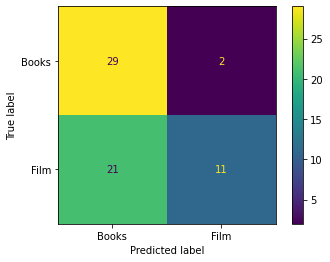

In [588]:
# calculate the matrix 
cm = confusion_matrix(target_test, predicted, labels=["Books","Film"])
# display it graphically
cmd = ConfusionMatrixDisplay(cm, display_labels=target_values)
cmd.plot();

In [589]:
print("The confusion matrix tells us the following:\n")
print("%d Book articles out of %d were correctly predicted."%(cm[0][0], cm[0][0] + cm[0][1]))
print("%d Film articles out of %d were correctly predicted."%(cm[1][1], cm[1][1] + cm[1][0]))

The confusion matrix tells us the following:

29 Book articles out of 31 were correctly predicted.
11 Film articles out of 32 were correctly predicted.


Precision, recall, and F1 scores can be computed to evaluate the performance on each measure.

In [590]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Precision (Books) = %.4f" % precision_score(target_test, predicted, pos_label="Books") )
print("Recall (Books) = %.4f" % recall_score(target_test, predicted, pos_label="Books") )

print("Precision (Film) = %.4f" % precision_score(target_test, predicted, pos_label="Film") )
print("Recall (Film) = %.4f" % recall_score(target_test, predicted, pos_label="Film") )

print("F1 (Books) = %.4f" % f1_score(target_test, predicted, pos_label="Books") )
print("F1 (Film) = %.4f\n" % f1_score(target_test, predicted, pos_label="Film") )

print(classification_report(target_test, predicted, target_names=target_values))

print("F1 score provides a single number that balances the concerns of both precision and recall scores. In this case, the above F1 scores give an idea of the model's accuracy in predicting each class.")

Precision (Books) = 0.5800
Recall (Books) = 0.9355
Precision (Film) = 0.8462
Recall (Film) = 0.3438
F1 (Books) = 0.7160
F1 (Film) = 0.4889

              precision    recall  f1-score   support

       Books       0.58      0.94      0.72        31
        Film       0.85      0.34      0.49        32

    accuracy                           0.63        63
   macro avg       0.71      0.64      0.60        63
weighted avg       0.72      0.63      0.60        63

F1 score provides a single number that balances the concerns of both precision and recall scores. In this case, the above F1 scores give an idea of the model's accuracy in predicting each class.


Binary classification and evaluation have been successfully carried out in the above steps for the Books and Film category pairing. For the sake of efficiency, these steps will be combined into a single function that will give the same output for each category pairing

In [591]:
data

,Category,Text
0,Books,Be honest. You're not going to read all those ...
1,Music,Mariah Carey's Twitter account hacked on New Y...
2,Books,Providence Lost by Paul Lay review â the ris...
3,Film,"War epics, airmen and young Sopranos: essentia..."
4,Books,'I'm on the hunt for humour and hope': what wi...
...,...,...
455,Film,"Baftas' status at stake in diversity debate, s..."
456,Film,How Brad Pitt's zen reinvention has paved the ...
457,Music,Radio 4's Brexit music: it feels like somethin...
458,Music,"Bob Shane obituary In 1958 the Kingston Trio, ..."


In [608]:
import numpy as np

#the below function was used to overcome a bug with the initial classify_and_evaluate function which was causing the input dataset to be altered
def test(df): #https://stackoverflow.com/questions/31614011/dataframe-modified-inside-a-function
    df = df.copy(deep=True)
    df['tt'] = np.nan
    return df

def classify_and_evaluate(data, cat1, cat2, col_name_info, col_name_class, test_set_proportion):

    data = test(data)
    print ('\033[1m' + 'Binary Classification and Evaluation Summary')
    print ('\033[0m')
    print("\n\nThe classes are %s and %s\n\n" %(cat1,cat2))

    df1 = get_df(data, cat1, cat2, col_name_class)
    documents = df1[col_name_info] #collection of documents
    target = df1[col_name_class]
    target_values = [cat1, cat2]
    
    print("Data Summary:\nNumber of articles by category:\n")
    print(df1[col_name_class].value_counts())
    print("\n\n")

    #create document-term matrix, Countvectoriser will return integer values
    vectorizer = CountVectorizer(min_df = 10, stop_words = new_stopwords) #I found that greater accuracy was achieved when english stop words were filtered
    X = vectorizer.fit_transform(documents)
    #print shape of document-term matrix
    print("Document-Term Matrix Shape:", X.shape)
    print("\n")
    #create vocabulary
    vocab = vectorizer.get_feature_names()
    print("Vocabulary has %d distinct terms" % len(vocab))
    print("\n")
    # display a set of sample terms
    print("Vocabulary Sample:", vocab[:10])
    print("\n")
    
    print("Term Weighting - Top 20:\n")
    # sum over the columns
    frequencies = X.sum(axis=0)
    # sort the indexes of the array by value, and then reverse it
    sorted_indexes = frequencies.argsort()
    sorted_indexes = sorted_indexes[0, ::-1]
    # display the top 20 terms
    for i in range(20):
        term_index = sorted_indexes[0,i]
        print("%d. %s = %.2f" % ((i+1), vocab[term_index], frequencies[0,term_index] ))
        
        data_training, data_test, target_training, target_test = train_test_split(X, target, test_size=test_set_proportion)
    
    print("\n\nTraining vs Test Data:\n")
    print("The data is split in the ratio of %d %s test data to %d %s training data" %(test_set_proportion*100,"%",(1-test_set_proportion)*100,"%"))
    print("Training data is made up of %d articles." % data_training.shape[0] )
    print("Test data is made up of %d articles." % data_test.shape[0] )
    
    model = KNeighborsClassifier(n_neighbors=3) #prepare KNN model for 3 nearest neighbours
    model.fit(data_training, target_training)
    predicted = model.predict(data_test) #make predictions for articles in the set
    print("\nBelow is the model's predictions of the class of each article in the test data:\n")
    print(predicted)
    print("\n")
    
    print ('\033[1m')
    print("Listed below are articles that are from the %s category, but were mistaken by the model as being from the %s category:\n" %(cat1, cat2))
    print ('\033[0m')
    
    for i, predicted_class in enumerate(predicted):
        if target_test.iloc[i] == cat1 and predicted_class == cat2:
            text = target_test.index[i]
            print("%s: %s\n" % ( text, df1.loc[text][col_name_info] ) )
            
    print ('\033[1m')
    print("Listed below are articles that are from the %s category, but were mistaken by the model as being from the %s category:\n" %(cat2, cat1))
    print ('\033[0m')
    
    for i, predicted_class in enumerate(predicted):
        if target_test.iloc[i] == cat2 and predicted_class == cat1:
            text = target_test.index[i]
            print("%s: %s\n" % ( text, df1.loc[text][col_name_info] ) )
    
    print ('\033[1m')
    print("\n\nAccuracy = %.4f" % accuracy_score(target_test, predicted))
    print ('\033[0m')
    
    # calculate the matrix 
    cm = confusion_matrix(target_test, predicted, labels=[cat1, cat2])
    # display it graphically
    cmd = ConfusionMatrixDisplay(cm, display_labels=target_values)
    cmd.plot();
    
    print ('\033[1m')
    print("Classification Report:\n")
    print ('\033[0m')
    print("Precision (%s) = %.4f" % (cat1, precision_score(target_test, predicted, pos_label=cat1) ))
    print("Recall (%s) = %.4f" %(cat1, recall_score(target_test, predicted, pos_label=cat1) ))

    print("Precision (%s) = %.4f"%(cat2,precision_score(target_test, predicted, pos_label=cat2) ))
    print("Recall (%s) = %.4f"%(cat2,recall_score(target_test, predicted, pos_label=cat2) ))

    print("F1 (%s) = %.4f" % (cat1, f1_score(target_test, predicted, pos_label=cat1) ))
    print("F1 (%s) = %.4f\n" %(cat2, f1_score(target_test, predicted, pos_label=cat2) ))
    
    print("F1 score provides a single number that balances the concerns of both precision and recall scores. In this case, the above F1 scores give an idea of the model's accuracy in predicting each class.\n")

    print(classification_report(target_test, predicted, target_names=target_values))
    
    print("\nThe Confusion Matrix below tells us the following:\n")
    print("%d %s articles out of %d were correctly predicted."%(cm[0][0], cat1, cm[0][1] + cm[0][0]))
    print("%d %s articles out of %d were correctly predicted."%(cm[1][1], cat2, cm[1][0] + cm[1][1]))
    
    print ('\033[1m')
    print("Confusion Matrix:")
    print ('\033[0m')
    
    

The remaining class pairs will no be run through the new function

### Music and Film

Binary Classification and Evaluation Summary



The classes are Music and Film


Data Summary:
Number of articles by category:

Film     152
Music    147
Name: Category, dtype: int64



Document-Term Matrix Shape: (299, 38)


Vocabulary has 38 distinct terms


Vocabulary Sample: ['academy', 'aged', 'album', 'awards', 'big', 'british', 'died', 'director', 'drama', 'ever']


Term Weighting - Top 20:

1. film = 72.00
2. music = 39.00
3. one = 31.00
4. first = 27.00
5. awards = 24.00
6. pop = 22.00
7. album = 21.00
8. two = 19.00
9. like = 19.00
10. director = 18.00
11. last = 17.00
12. globes = 17.00
13. oscar = 17.00
14. movie = 17.00
15. festival = 17.00
16. itâ = 17.00
17. golden = 17.00
18. british = 16.00
19. drama = 15.00
20. big = 15.00


Training vs Test Data:

The data is split in the ratio of 20 % test data to 80 % training data
Training data is made up of 239 articles.
Test data is made up of 60 articles.

Below is the model's predictions of the class of each article in the tes

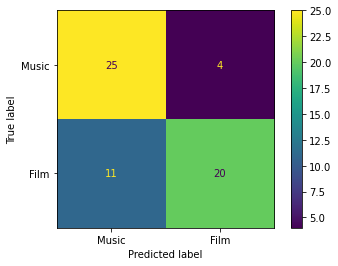

In [609]:
#classification and evaluation for music and film category pair
classify_and_evaluate(dataset, 'Music', 'Film', 'Text', 'Category', 0.2)

### Books and Music

Binary Classification and Evaluation Summary



The classes are Music and Books


Data Summary:
Number of articles by category:

Books    161
Music    147
Name: Category, dtype: int64



Document-Term Matrix Shape: (308, 35)


Vocabulary has 35 distinct terms


Vocabulary Sample: ['age', 'aged', 'album', 'american', 'author', 'book', 'books', 'debut', 'died', 'fiction']


Term Weighting - Top 20:

1. book = 43.00
2. first = 38.00
3. music = 36.00
4. one = 29.00
5. novel = 29.00
6. two = 24.00
7. album = 21.00
8. last = 21.00
9. pop = 21.00
10. like = 19.00
11. us = 18.00
12. books = 18.00
13. london = 16.00
14. author = 14.00
15. fiction = 14.00
16. obituary = 14.00
17. age = 14.00
18. itâ = 13.00
19. died = 13.00
20. good = 12.00


Training vs Test Data:

The data is split in the ratio of 20 % test data to 80 % training data
Training data is made up of 246 articles.
Test data is made up of 62 articles.

Below is the model's predictions of the class of each article in the test data:

[

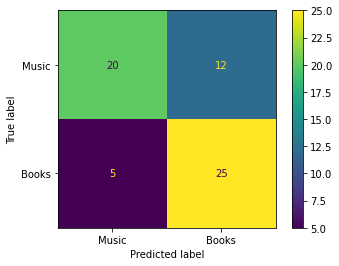

In [610]:
#classification for books and music classification pair
classify_and_evaluate(dataset, 'Music', 'Books', 'Text', 'Category', 0.2)

## Task 3: Multi-Class Text Classification

### Preprocessing

Recall the dataset being used.

In [611]:
data.head(10)

,Category,Text
0,Books,Be honest. You're not going to read all those ...
1,Music,Mariah Carey's Twitter account hacked on New Y...
2,Books,Providence Lost by Paul Lay review â the ris...
3,Film,"War epics, airmen and young Sopranos: essentia..."
4,Books,'I'm on the hunt for humour and hope': what wi...
5,Film,The most exciting movies of 2020 â horror Th...
6,Books,Diary of a Murderer by Kim Young-ha review â...
7,Books,TS Eliotâs intimate letters to confidante un...
8,Music,Woodford folk festival review â a much-neede...
9,Film,In the Line of Duty review â race-against-ti...


The 3 article categories or classes are Books, Music, and Film.

In [612]:
target_values = ["Books", "Film", "Music"]
documents = data["Text"]# Content for all documents
target = df["Category"]# Class labels for all documents

In [613]:
target.value_counts() #display distribution of data across categories

Books    161
Film     152
Music    147
Name: Category, dtype: int64

In [614]:
#create document-term matrix, Countvectoriser will return integer values
vectorizer = CountVectorizer(min_df = 10, stop_words = new_stopwords) #stop words will be kept in due to the varying themes of documents in each category
X = vectorizer.fit_transform(documents)
#print shape of document-term matrix
print("Matrix Shape:",X.shape)
#create vocabulary
vocab = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(vocab)) 
# display a set of sample terms
print(vocab[:10]) #print sample of vocabulary

Matrix Shape: (460, 74)
Vocabulary has 74 distinct terms
['academy', 'age', 'aged', 'album', 'american', 'announced', 'author', 'award', 'awards', 'back']


Term frequency analysis is carried out in a similar manner to task 2.

In [615]:
frequencies = X.sum(axis=0) # sum over the columns
sorted_indexes = frequencies.argsort() # sort the indexes of the array by value, and then reverse it
sorted_indexes = sorted_indexes[0, ::-1]
# display top 20 terms
for i in range(20):
    term_index = sorted_indexes[0,i]
    print("%d. %s = %.2f" % ((i+1), vocab[term_index], frequencies[0,term_index] ))

1. film = 73.00
2. first = 48.00
3. book = 46.00
4. one = 41.00
5. music = 40.00
6. two = 32.00
7. novel = 29.00
8. last = 28.00
9. awards = 27.00
10. like = 25.00
11. pop = 23.00
12. war = 22.00
13. us = 22.00
14. itâ = 21.00
15. album = 21.00
16. story = 21.00
17. young = 20.00
18. british = 20.00
19. director = 19.00
20. oscar = 19.00


A KNN model will be built and evaluated using a single test/training split.

The data will be split into 80% training data and 20% test data.

In [616]:
data_training, data_test, target_training, target_test = train_test_split(X, target, test_size=0.2)
print("Training data is made up of %d articles." % data_training.shape[0] )
print("Test data is made up of %d articles." % data_test.shape[0] )
model = KNeighborsClassifier(n_neighbors=3) #prepare KNN model for 3 nearest neighbours

Training data is made up of 368 articles.
Test data is made up of 92 articles.


In [617]:
model.fit(data_training, target_training)
predicted = model.predict(data_test) #make predictions for articles in the set
predicted[:10] #print a sample

array(['Books', 'Music', 'Books', 'Books', 'Music', 'Music', 'Music',
       'Books', 'Books', 'Film'], dtype=object)

### Evaluation

Seeing as the test set is small, we can probably see all the cases where the model made a mistake, however I will just print 5 examples to save space.

In [618]:
counter = 0
for i, predicted_class in enumerate(predicted):
    if target_test[i] == "Books" and (predicted_class == "Film" or predicted_class == "Music"): #find "Books" articles that were mistaken as "Film" articles
        text = target_test.index[i]
        print("%s: " % text)
        counter += 1
    if counter == 5:
        break


Uncanny Valley: A Memoir by Anna Wiener review â beggars and tech billionaires: 
Stephen King faces backlash over comments on Oscars diversity: 
In brief: On the Up; How to Be an Activist; The Silent Patient â reviews: 
In the Dream House by Carmen Maria Machado â review: 
Dear Life by Rachel Clarke review â somewhere towards the end: 


In [619]:
counter = 0
for i, predicted_class in enumerate(predicted):
    if target_test[i] == "Music" and (predicted_class == "Film" or predicted_class == "Books"): #find "Music" articles that were mistaken as "Books" or Film articles
        text = target_test.index[i]
        print("%s: " % text)
        counter += 1
    if counter == 5:
        break

Pet Shop Boys: Hotspot review â evergreen dancefloor nous: 
La Roux: 'My label dropped me on New Year's Day. I was like, yippee!': 
The familiar Sydney sound spliced into Billie Eilish's Bad Guy: 
Keeley Forsyth: how the Happy Valley actor became the new Scott Walker: 
Woodford folk festival review â a much-needed moment of positivity and reprieve: 


In [620]:
counter = 0
for i, predicted_class in enumerate(predicted):
    if target_test[i] == "Film" and (predicted_class == "Books" or predicted_class == "Music"): #find "Film" articles that were mistaken as "Books" or "Music" articles
        text = target_test.index[i]
        print("%s: " % text) 
        counter += 1
    if counter == 5:
        break

Queen & Slim review â odd couple on the run in a punchy thriller: 
Vegan food, recycled tuxedos â and billions of tonnes of CO2: can Hollywood ever go green?: 
Deadly charms: can Kit Harington survive Marvel's The Eternals?: 
Downhill review â Ferrell and Louis-Dreyfus crash with redundant remake: 
The Rescue review â turbulent Chinese air-rescue adventure: 


In [621]:
print("Accuracy = %.4f" % accuracy_score(target_test, predicted))

Accuracy = 0.4891


Accuracy was improved by removing english stop words and custom stop words.

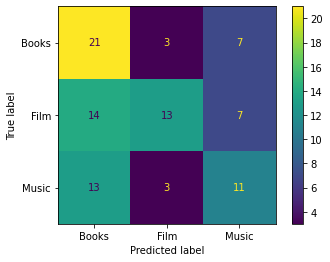

In [622]:
# calculate the matrix 
cm = confusion_matrix(target_test, predicted, labels=["Books","Film", "Music"])
# display it graphically
cmd = ConfusionMatrixDisplay(cm, display_labels=target_values)
cmd.plot();

In [623]:
print("The confusion matrix tells us the following:\n")
print("%d Book articles out of %d were correctly predicted."%(cm[0][0], cm[0][1] + cm[0][2] + cm[0][0]))
print("%d Film articles out of %d were correctly predicted."%(cm[1][1], cm[1][1] + cm[1][2] + cm[1][0]))
print("%d Music articles out of %d were correctly predicted."%(cm[2][2], cm[2][1] + cm[2][2] + cm[2][0]))

The confusion matrix tells us the following:

21 Book articles out of 31 were correctly predicted.
13 Film articles out of 34 were correctly predicted.
11 Music articles out of 27 were correctly predicted.
